In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib widget
%matplotlib inline

### 读取数据集

In [2]:
import os
def get_datasets(path='../UCRArchive_2018'):
    dirs = os.listdir(path)
    return dirs

In [3]:
datasets = get_datasets()
print(datasets)

['Fungi', 'Yoga', 'ECGFiveDays', 'Wine', 'Symbols', 'SemgHandGenderCh2', 'FordB', 'SmallKitchenAppliances', 'SonyAIBORobotSurface2', 'MoteStrain', 'MixedShapesSmallTrain', 'Worms', 'UWaveGestureLibraryY', 'TwoLeadECG', 'GunPointAgeSpan', 'UMD', 'CinCECGTorso', 'PhalangesOutlinesCorrect', 'Adiac', 'DodgerLoopWeekend', 'CBF', 'PigCVP', 'DistalPhalanxTW', 'FaceFour', 'Crop', 'ElectricDevices', 'OliveOil', 'Chinatown', 'GunPointOldVersusYoung', 'HouseTwenty', 'UWaveGestureLibraryAll', 'DodgerLoopDay', 'DodgerLoopGame', 'Car', 'AllGestureWiimoteY', 'HandOutlines', 'BirdChicken', 'WordSynonyms', 'SmoothSubspace', 'SyntheticControl', 'BME', 'UWaveGestureLibraryZ', 'TwoPatterns', 'FordA', 'FiftyWords', 'UWaveGestureLibraryX', 'SemgHandMovementCh2', 'FaceAll', 'FreezerSmallTrain', 'ProximalPhalanxTW', 'PickupGestureWiimoteZ', 'DistalPhalanxOutlineAgeGroup', 'Meat', 'MixedShapesRegularTrain', 'AllGestureWiimoteX', 'FacesUCR', 'InsectEPGRegularTrain', 'NonInvasiveFetalECGThorax1', 'ECG200', 'Beef

In [4]:
def load_data(dataset='ACSF1', path = '../UCRArchive_2018/'):
    # define paths
    path += '%s/' % dataset
    train_path = path + '%s_TRAIN.tsv' % dataset
    test_path = path + '%s_TEST.tsv' % dataset
    # load data
    train_data = pd.read_csv(train_path, sep='\t', header=None)
    test_data = train = pd.read_csv(test_path, sep='\t', header=None)
    # load info
    info_path = path + 'README.md'
    with open(info_path, encoding='utf-8') as f:
        line = f.readlines()
        for each in line:
            if each != '\n': print(each)
    return train_data, test_data

In [22]:
dataset = datasets[6]
dataset='OSULeaf'
print(dataset)

OSULeaf


In [23]:
path = './%s/' % dataset
if not os.path.exists(path):
    os.makedirs(path)

In [24]:
train, test = load_data(dataset=dataset)

# OSULeaf

The *OSULeaf* data set consists of one dimensional outlines of leaves. The series were obtained by color image segmentation and boundary extraction (in the anti-clockwise direction) from digitized leaf images of six classes: Acer Circinatum, Acer Glabrum, Acer Macrophyllum, Acer Negundo, Quercus Garryana and Quercus Kelloggii. Data were made as part of the MSc thesis of Ashit Grandhi [1].

Train size: 200

Test size: 242

Missing value: No

Number of classses: 6

Time series length: 427

Data donated by Ashit Gandhi (see [1], [2]).

[1] Gandhi, Ashit. "Content-based image retrieval: Plant species identification." Oregon State University (2002).

[2] http://www.timeseriesclassification.com/description.php?Dataset=OSULeaf


In [25]:
train.shape, test.shape

((200, 428), (242, 428))

In [18]:
def merge_data(train, test):
    frames = [train, test]
    data = pd.concat(frames)
    return data

In [10]:
data = merge_data(train, test)

In [11]:
data.shape

(200, 276)

In [12]:
def seperate_label(data):
    data = np.array(data)
    label = data[:, 0]
    value = data[:, 1: ]
    return label, value

In [13]:
label, value = seperate_label(data)

In [14]:
value.shape, label.shape

((200, 275), (200,))

### 切割x与y

In [15]:
value = value.reshape(value.shape[0], value.shape[1], 1)

In [16]:
def split_x_y(value, ratio=0.2):
    y_len = int(value.shape[1] * ratio)
    x_len = int(value.shape[1] - y_len)
    return value[:, : x_len], value[:, -y_len: ]

In [17]:
x, y = split_x_y(value, ratio=0.2)

In [18]:
x.shape, y.shape

((200, 220, 1), (200, 55, 1))

In [19]:
value[:, :, 0].shape

(200, 275)

In [ ]:
# save dataset
save_data = {'data': value[:, :, 0], 'prediction_length': y.shape[1]}
np.save('./datasets/%s.npy' % dataset, save_data)

### K-Shape 聚类

In [ ]:
from tslearn.clustering import KShape

In [ ]:
seed = 42
clusters = len(set(label))
print(clusters, 'clusters in total')

In [ ]:
ks = KShape(n_clusters=clusters, verbose=True, random_state=seed)
label_ks = ks.fit_predict(x)

### 计算轮廓系数

In [ ]:
# from tslearn.clustering import silhouette_score

# dists = ks._mx_cross_dist(x)
# np.fill_diagonal(dists, 0) # 重要 由于计算出的距离矩阵只是负8次方，还不是真正的零，得替换，否则会报错

# score = silhouette_score(dists, label, metric="precomputed")
# print(score)

### ------------------------

In [ ]:
x_plot = x

In [20]:
fontsize=30
labelcolor='black'

In [ ]:
# display_start, display_end=0, 100

# fig=plt.figure(figsize=(30,4))
# grid=plt.GridSpec(1, clusters, wspace=0.3, hspace=0.4)

# # clusters
# i = 0
# for label in range(clusters):
#     plt.subplot(grid[0, i])
#     series = x_plot[label_ks == label][display_start: display_end]
#     for s in series:
#         plt.plot(np.arange(0, len(s)), s.ravel(), "k-", alpha=.5)
#     # center
#     center_s = np.mean(series, axis=0)
    
#     bwith = 2
#     bcolor = 'black'
#     ax = plt.gca()
#     ax.spines['bottom'].set_color(bcolor)
#     ax.spines['left'].set_color(bcolor)
#     ax.spines['top'].set_color(bcolor)
#     ax.spines['right'].set_color(bcolor)

#     ax.spines['bottom'].set_linewidth(bwith)
#     ax.spines['left'].set_linewidth(bwith)
#     ax.spines['top'].set_linewidth(bwith)
#     ax.spines['right'].set_linewidth(bwith)
    
#     plt.plot(np.arange(0, center_s.shape[0]), center_s.ravel(), 'r-', linewidth=1.5, alpha=0.8)
#     plt.title('cluster%d' % (label + 1), fontsize=fontsize, color=labelcolor)
#     i += 1
#     plt.tick_params(labelsize=fontsize, labelcolor=labelcolor)
#     plt.xlim(0, series.shape[1]-1)
#     plt.ylim(np.min(series), np.max(series) + 1)
    
# plt.tight_layout()
# plt.savefig('%scluster_kshape_%s.pdf' % (path, dataset), dpi=1200, format='pdf')
# plt.show()

In [ ]:
# for i in range(clusters):
#     print("cluster %d: %d samples" % (i + 1, sum(label_ks == i)))

### Shapelet 提取

In [ ]:
import tensorflow as tf
from tslearn.shapelets import LearningShapelets, grabocka_params_to_shapelet_size_dict
from sklearn.metrics import accuracy_score
from tslearn.utils import ts_size

In [ ]:
# Get statistics of the dataset
n_ts, ts_sz = x.shape[:2]
n_classes = len(set(label_ks))

In [ ]:
n_classes

In [ ]:
# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.05,
                                                       r=1)
print(shapelet_sizes)

In [ ]:
for key, value in shapelet_sizes.items():
    if key % 2 != 0:
        shapelet_sizes = {key + 1: value}
print(shapelet_sizes)

In [ ]:
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer=tf.optimizers.Adam(.06),
                            batch_size=1024,
                            weight_regularizer=1e-3,
                            max_iter=200,
                            random_state=42,
                            verbose=2)
shp_clf.fit(x, label_ks)

In [ ]:
# The loss history is accessible via the `model_` that is a keras model
plt.figure()
plt.plot(np.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.tight_layout()
plt.show()

In [ ]:
# Make predictions and calculate accuracy score
pred_labels = shp_clf.predict(x)
print("Correct classification rate:", accuracy_score(label_ks, pred_labels))

### 分类评价

In [ ]:
import sklearn.metrics as metrics

海明距离 - [0,1]距离为0说明预测结果与真实结果完全相同，距离为1就说明模型与我们想要的结果完全就是背道而驰。

In [ ]:
metrics.hamming_loss(label_ks, pred_labels)

杰卡德相似系数 - 当预测结果与实际情况完全相符时，系数为1；当预测结果与实际情况完全不符时，系数为0；当预测结果是实际情况的真子集或真超集时，距离介于0到1之间。

In [ ]:
metrics.jaccard_score(label_ks, pred_labels, average='micro')

In [ ]:
metrics.jaccard_score(label_ks, pred_labels, average='macro')

In [ ]:
metrics.jaccard_score(label_ks, pred_labels, average='weighted')

Kappa系数 - kappa系数是用在统计学中评估一致性的一种方法，取值范围是[-1,1]，实际应用中，一般是[0,1]，与ROC曲线中一般不会出现下凸形曲线的原理类似。这个系数的值越高，则代表模型实现的分类准确度越高。

In [ ]:
metrics.cohen_kappa_score(label_ks, pred_labels)

分类报告

In [ ]:
metrics.classification_report(label_ks, pred_labels, output_dict=True)

### ------------------------------

In [ ]:
# save pre trained shapelets
shp_path = '%sshapelets' % path
shapelets = shp_clf.shapelets_as_time_series_
np.save(shp_path, shapelets)

In [ ]:
# Plot the different discovered shapelets
plt.figure()
for i, sz in enumerate(shapelet_sizes.keys()):
    plt.subplot(len(shapelet_sizes), 1, i + 1)
    plt.title("%d shapelets of size %d" % (shapelet_sizes[sz], sz))
    for shp in shp_clf.shapelets_:
        if ts_size(shp) == sz:
            plt.plot(shp.ravel())
    plt.xlim([0, max(shapelet_sizes.keys()) - 1])

plt.tight_layout()
plt.show()

In [ ]:
shapelets = shp_clf.shapelets_
s = shp_clf.shapelets_as_time_series_
predicted_locations = shp_clf.locate(x)

In [21]:
y = y.reshape(y.shape[0], 1, y.shape[1])
y.shape

(200, 1, 55)

In [22]:
x = x.reshape(x.shape[0], 1, x.shape[1])
x.shape

(200, 1, 220)

### 训练网络

In [23]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch import optim

In [24]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
import numpy as np
import pandas as pd
from scipy import signal
import time

In [25]:
def diff1d(x):
    d = None
    for i in range(1, x.shape[2]):
        di = x[:, :, i: i + 1] - x[:, :, i - 1: i]
        d = di if d is None else torch.cat((d, di), dim=2)
    return d

In [26]:
def CORT(x, y):
    numer = torch.sum(torch.mul(x, y), dim=2, keepdim=True)
    n2x = torch.norm(x, p=2, dim=2, keepdim=True)
    n2y = torch.norm(y, p=2, dim=2, keepdim=True)
    cort = numer / (n2x * n2y + 1)
    return cort

In [27]:
class QuantileLoss(nn.Module):

    def __init__(self, quantiles):
        # list of quantiles
        super().__init__()
        self.quantiles = quantiles
        
    def forward(self, preds, target):
        assert not target.requires_grad
        assert preds.size(0) == target.size(0)
        losses = []
        for i, q in enumerate(self.quantiles):
            errors = target - preds
            losses.append(
                2 * torch.max(
                   (q-1) * errors, 
                   q * errors
            ).unsqueeze(1))
        loss = torch.mean(
            torch.sum(torch.cat(losses, dim=1), dim=1))
        return loss

In [28]:
class Clip1d(nn.Module):
    def __init__(self, clip_size):
        super(Clip1d, self).__init__()
        self.clip_size = clip_size

    def forward(self, x):
        return x[:, :, :-self.clip_size].contiguous()

In [29]:
class CausalConv1d(nn.Conv1d):
    def __init__(self, in_channels, out_channels, kernel_size=1, stride=1,
                 padding=0, dilation=1, groups=1, bias=False):
        super(CausalConv1d, self).__init__(in_channels, out_channels, kernel_size, stride,
                                           padding, dilation, groups, bias)
    
    def forward(self, inputs):
        outputs = super(CausalConv1d, self).forward(inputs)
        return outputs

In [30]:
class ResidualAtrousConv1d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, dilation, padding, dropout=0.2):
        super(ResidualAtrousConv1d, self).__init__()
        self.conv1 = CausalConv1d(in_channels, out_channels, kernel_size,
                                  stride=stride, padding=padding, dilation=dilation)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.clip1 = Clip1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = CausalConv1d(out_channels, out_channels, kernel_size,
                                  stride=stride, padding=padding, dilation=dilation)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.clip2 = Clip1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.bn1, self.clip1, self.relu1, self.dropout1,
                                 self.conv2, self.bn2, self.clip2, self.relu2, self.dropout2)
        self.downsample = CausalConv1d(in_channels, out_channels, 1) if in_channels != out_channels else None
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

In [31]:
# class Shapelet1d(nn.Module):
#     def __init__(self, in_channels, out_channels, shapelets, attrs, topk, shp_features):
#         super(Shapelet1d, self).__init__()
#         self.shapelets = shapelets
#         self.pre_conv = CausalConv1d(in_channels=in_channels, out_channels=1, kernel_size=1)
#         self.attrs = attrs
#         self.topk = topk
# #         self.attrs_num = len(attrs) if attrs is not None else 0
# #         self.post_conv = CausalConv1d(in_channels=shapelets.shape[0] * self.attrs_num + 1, out_channels=out_channels, kernel_size=1)
# #         self.bn = nn.BatchNorm1d(out_channels)
# #         self.init_weights()
    
#     def compute_sim(self, x):
#         m = x.shape[0] # batch size
#         # zero padding
#         pad = int(self.shapelets.shape[1] / 2)
#         zero = torch.zeros(m, 1, pad).cuda()
#         x_pad = torch.cat((zero, x, zero), dim=2)
#         # transform
#         vector_sample = torch.Tensor().cuda()
        
#         for i in range(pad, x_pad.shape[2] - pad, 1):
#             ctx_l = x_pad[:, :, i-pad: i]
#             ctx_r = x_pad[:, :, i+1: i+1+pad]
#             context = torch.cat((ctx_l, ctx_r), dim=2)
# #             context = x_pad[:, :, i-pad: i+1+pad]
#             vector_sample = torch.cat((vector_sample, context), dim=1)
        
#         VSD, SBD = None, None
#         for i in range(self.shapelets.shape[0]):
#             shpi = torch.tensor(self.shapelets[i, :, 0], dtype=torch.float32).cuda()
#             # VSD
#             if 'VSD' in self.attrs:
#                 featurei = torch.norm(vector_sample - shpi, p=2, dim=2, keepdim=True) / self.shapelets.shape[1]
#                 featurei = featurei.permute((0, 2, 1))
#                 VSD = featurei if VSD is None else torch.cat((VSD, featurei), dim=1)
# #                 x = torch.cat((x, featurei), dim=1)
            
#             # SBD - CORT
#             if 'SBD' in self.attrs: 
#                 shpi = shpi.reshape(1, 1, shpi.shape[0])
#                 ds = diff1d(shpi)
#                 dv = diff1d(vector_sample)
#                 corti = CORT(ds, dv)
#                 corti = corti.permute((0, 2, 1))
#                 SBD = corti if SBD is None else torch.cat((SBD, corti), dim=1)
# #                 x = torch.cat((x, corti), dim=1)
    
# #             # VMD
# #             featurei = torch.norm(vector_sample - shpi, p=1, dim=2, keepdim=True) / self.shapelets.shape[1]
# # #             featurei = featurei.view(m, featurei.shape[2], featurei.shape[1])
# #             featurei = featurei.permute(0, 2, 1)
# #             x = torch.cat((x, featurei), dim=1)
        
# #             # DPR
# #             featurei = torch.sum(torch.mul(vector_sample, shpi), dim=2, keepdim=True) / (torch.sum(vector_sample, dim=2, keepdim=True) + 1)
# #             featurei = featurei.view(m, featurei.shape[2], featurei.shape[1])
# # #             featurei = featurei.permute(0, 2, 1)
# #             x = torch.cat((x, featurei), dim=1)
            
#         return VSD, SBD
    
#     def fuse_sim(self, VSD, SBD):
#         VSDk, VSDk_idx = VSD.topk(self.topk, dim=1, largest=True, sorted=True)
#         SBDk, SBDk_idx = SBD.topk(self.topk, dim=1, largest=True, sorted=True)
        
#         ts_num, ts_len = VSD.shape[0], VSD.shape[-1]
#         fVSD, fSBD = None, None
#         for i in range(ts_num):
#             # VSD
#             VSDi = VSDk_idx[i, :, :]
#             fi = None
#             for j in range(ts_len):
#                 for k in range(self.topk):
#                     idx = VSDk_idx[i, k, j]
#                     fi = shp_features[idx] if fi is None else fi + shp_features[idx]
#             fi_VSD = fi / self.topk
#             fi_VSD = fi_VSD.reshape(1, fi_VSD.shape[0])
#             fVSD = fi_VSD if fVSD is None else torch.cat((fVSD, fi_VSD), dim=0)
#             # SBD
#             SBDi = SBDk_idx[i, :, :]
#             fi = None
#             for j in range(ts_len):
#                 for k in range(self.topk):
#                     idx = SBDk_idx[i, k, j]
#                     fi = shp_features[idx] if fi is None else fi + shp_features[idx]
#             fi_SBD = fi / self.topk
#             fi_SBD = fi_SBD.reshape(1, fi_SBD.shape[0])
#             fSBD = fi_SBD if fSBD is None else torch.cat((fSBD, fi_SBD), dim=0)
#         return fVSD, fSBD    
        

#     def init_weights(self):
#         self.pre_conv.weight.data.normal_(0, 0.01)
#         self.post_conv.weight.data.normal_(0, 0.01)
    
#     def forward(self, x):
# #         x = self.pre_conv(x)
#         VSD, SBD = self.compute_sim(x)
#         print(VSD.shape, SBD.shape)
        
#         self.fuse_sim(VSD, SBD)
        
# #         x_avg = torch.mean(x, dim=2)
# #         x_avg = x_avg[:, 1: ]
# #         x = self.post_conv(x)
# #         x = torch.relu(x)
# #         x = self.bn(x)
#         return x
# #         return x

In [32]:
from tsfresh.feature_extraction.feature_calculators import *

In [33]:
class Shapelet1d():
    def __init__(self, shapelets, attrs, topk):
        self.shapelets = shapelets
        self.attrs = attrs
        self.topk = topk
    
    def extract_features(self):
        num_shp = self.shapelets.shape[0]
        shp_features = []
        for i in range(num_shp):
            shpi_features = []
            shpi = self.shapelets[i, :, 0]
            # --- features --- #
            f = abs_energy(shpi)
            shpi_features.append(f)

            f = autocorrelation(shpi, lag=1)
            shpi_features.append(f)

            f = maximum(shpi)
            shpi_features.append(f)

            f = mean(shpi)
            shpi_features.append(f)

            f = mean_second_derivative_central(shpi)
            shpi_features.append(f)

            f = median(shpi)
            shpi_features.append(f)

            f = minimum(shpi)
            shpi_features.append(f)

            f = standard_deviation(shpi)
            shpi_features.append(f)

            f = variance(shpi)
            shpi_features.append(f)

            shp_features.append(shpi_features)
        shp_features = torch.tensor(shp_features, dtype=torch.float32)
        return shp_features
    
    def compute_sim(self, x):
        print('computing similarity...', end='')
        m = x.shape[0] # batch size
        # zero padding
        pad = int(self.shapelets.shape[1] / 2)
        zero = torch.zeros(m, 1, pad)
        x_pad = torch.cat((zero, x, zero), dim=2)
        # transform
        vector_sample = torch.Tensor()
        
        for i in range(pad, x_pad.shape[2] - pad, 1):
            ctx_l = x_pad[:, :, i-pad: i]
            ctx_r = x_pad[:, :, i+1: i+1+pad]
            context = torch.cat((ctx_l, ctx_r), dim=2)
            vector_sample = torch.cat((vector_sample, context), dim=1)
        
        VSD, SBD = None, None
        for i in range(self.shapelets.shape[0]):
            shpi = torch.tensor(self.shapelets[i, :, 0], dtype=torch.float32)
            # VSD
            if 'VSD' in self.attrs:
                featurei = torch.norm(vector_sample - shpi, p=2, dim=2, keepdim=True) / self.shapelets.shape[1]
                featurei = featurei.permute((0, 2, 1))
                VSD = featurei if VSD is None else torch.cat((VSD, featurei), dim=1)
            
            # SBD - CORT
            if 'SBD' in self.attrs: 
                shpi = shpi.reshape(1, 1, shpi.shape[0])
                ds = diff1d(shpi)
                dv = diff1d(vector_sample)
                corti = CORT(ds, dv)
                corti = corti.permute((0, 2, 1))
                SBD = corti if SBD is None else torch.cat((SBD, corti), dim=1)
        print('Done!')
        return VSD, SBD
    
    def fuse_sim(self, VSD, SBD, shp_features):
        if VSD is not None:
            VSDk, VSDk_idx = VSD.topk(self.topk, dim=1, largest=True, sorted=True)
            ts_num, ts_len = VSD.shape[0], VSD.shape[-1]
        if SBD is not None:
            SBDk, SBDk_idx = SBD.topk(self.topk, dim=1, largest=True, sorted=True)
            ts_num, ts_len = SBD.shape[0], SBD.shape[-1]
        
        fVSD, fSBD = None, None
        for i in range(ts_num):
            print('\rprocessing %d/%d...' % (i + 1, ts_num), end='')
            # VSD
            if VSD is not None:
                VSDi = VSDk_idx[i, :, :]
                fi = None
                for j in range(ts_len):
                    for k in range(self.topk):
                        idx = VSDk_idx[i, k, j]
                        fi = shp_features[idx] if fi is None else fi + shp_features[idx]
                fi_VSD = fi / self.topk
                fi_VSD = fi_VSD.reshape(1, fi_VSD.shape[0])
                fVSD = fi_VSD if fVSD is None else torch.cat((fVSD, fi_VSD), dim=0)
                
            # SBD
            if SBD is not None:
                SBDi = SBDk_idx[i, :, :]
                fi = None
                for j in range(ts_len):
                    for k in range(self.topk):
                        idx = SBDk_idx[i, k, j]
                        fi = shp_features[idx] if fi is None else fi + shp_features[idx]
                fi_SBD = fi / self.topk
                fi_SBD = fi_SBD.reshape(1, fi_SBD.shape[0])
                fSBD = fi_SBD if fSBD is None else torch.cat((fSBD, fi_SBD), dim=0)
        print('Done!')
        return fVSD, fSBD    
    
    def feature_normalize(self, x):
        mu = torch.mean(x)
        std = torch.std(x)
        return (x - mu)/std
    
    def fusion(self, x):
        shp_features = self.extract_features()
        VSD, SBD = self.compute_sim(x)
        fVSD, fSBD = self.fuse_sim(VSD, SBD, shp_features)

        if len(self.attrs) == 2:
            fusion = torch.cat((fVSD, fSBD), dim=1)
        elif len(self.attrs) == 1:
            if fVSD is not None: fusion = fVSD 
            if fSBD is not None: fusion = fSBD 
        fusion = fusion.reshape(fusion.shape[0], 1, fusion.shape[-1])
        fusion = self.feature_normalize(fusion)
        return fusion

In [34]:
class ReCNet(nn.Module):
    def __init__(self, shapelets, num_inputs, num_channels, backcast_horizon, forecast_horizon,
                 kernel_size=2, dropout=0.2, attrs=['VSD', 'SBD'], feature_len=9):
        super(ReCNet, self).__init__()
        self.attrs = attrs
        self.out_channel = num_channels[-1]
        self.backcast_horizon = backcast_horizon
        if attrs is not None: self.fusion_len = feature_len * len(attrs)
        self.fuser = Shapelet1d(shapelets=shapelets, attrs=attrs, topk=shapelets.shape[0] // 2)
        
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i - 1]
            out_channels = num_channels[i]
            layers += [ResidualAtrousConv1d(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                            padding=(kernel_size - 1) * dilation_size, dropout=dropout)]
        self.network = nn.Sequential(*layers)
        if self.attrs is None: # fusion disabled
            self.linear = nn.Linear(self.out_channel * self.backcast_horizon, forecast_horizon)
        else: # fusion enabled
            self.linear = nn.Linear(self.out_channel * self.backcast_horizon + self.fusion_len, forecast_horizon)
    
    def _initialize_weights(self, output=True):
        for m in self.modules():
            if output: print(m)
            if isinstance(m, (nn.Linear, nn.Conv1d)):
                torch.nn.init.xavier_uniform_(m.weight, gain=1)
    
    def preprocess(self, x, y, test_size=0.2, batch_size=256, random_seed=42):
        # split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_seed)
        print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
        # convert
        x_train = torch.tensor(x_train, dtype=torch.float32)
        y_train = torch.tensor(y_train, dtype=torch.float32)
        x_test = torch.tensor(x_test, dtype=torch.float32)
        y_test = torch.tensor(y_test, dtype=torch.float32)
        
        y_train = y_train.reshape(y_train.shape[0], y_train.shape[2])
        y_test = y_test.reshape(y_test.shape[0], y_test.shape[2])
        # fusion
        if self.attrs is not None:
            fusion = self.fuser.fusion(x_train)
            x_train = torch.cat((x_train, fusion), dim=2)
            fusion = self.fuser.fusion(x_test)
            x_test = torch.cat((x_test, fusion), dim=2)
        
        # load
        dataset_train = Data.TensorDataset(x_train, y_train)
        loader = Data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=2)
        
        batch_num = 0
        for step, (batch_x, batch_y) in enumerate(loader):
            print('x size:', batch_x.shape, ', y size:', batch_y.shape)
            batch_num += 1
        print('%d batches' % batch_num)
        return loader, x_train, y_train, x_test, y_test
        
    def fit(self, loader, device, epochs=100, learning_rate=1e-3, weight_decay=1e-6):
        self._initialize_weights(output=False)
        criterion = QuantileLoss([0.1, 0.5, 0.9])
        optimizer = optim.Adam(self.parameters(), lr=learning_rate, weight_decay=weight_decay)
        train_losses, test_losses = [], []

        for epoch in range(epochs):
            batch_cnt, running_loss = 0, 0
            t_start = time.time()
            
            for step, (batch_x, batch_y) in enumerate(loader):
                input_x = batch_x.to(device)
                y = batch_y.to(device)  

                output_data = net(input_x)
                loss = criterion(output_data, y)

                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                running_loss += loss.item()
                batch_cnt += 1
                
            train_losses.append(running_loss / batch_cnt)
            test_losses.append(criterion(net(x_test.to(device)), y_test.to(device)).item() )
            t_end = time.time()

            print('\repoch=%d, loss=%.6f, time=%.2fs per epoch      ' \
                  % (epoch+1, train_losses[-1], t_end - t_start), end='')
        return train_losses, test_losses

    
    def forward(self, x):
        if self.attrs is not None:
            x, x_fuse = x[:, :, :-self.fusion_len], x[:, :, -self.fusion_len: ]
        
        x_out = self.network(x)
        x_out = x_out.view(-1, self.out_channel * self.backcast_horizon)
        if self.attrs is not None:
            x_fuse = x_fuse.reshape(x_fuse.shape[0], x_fuse.shape[-1])
            x_out = torch.cat((x_out, x_fuse), dim=1)
            
        x_out = self.linear(x_out)
        return x_out

## ------------不同类别测试--------------

In [35]:
# s_label = set(label)
# s_label

In [36]:
# for each in s_label:
#     each = int(each)
#     print('*** label ', each, ' ***')
#     x_c, y_c = x[label==each], y[label==each]
    
#     x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size=0.2)
#     x_train = torch.tensor(x_train, dtype=torch.float32)
#     y_train = torch.tensor(y_train, dtype=torch.float32)
#     x_test = torch.tensor(x_test, dtype=torch.float32)
#     y_test = torch.tensor(y_test, dtype=torch.float32)
    
#     y_train = y_train.reshape(y_train.shape[0], y_train.shape[2])
#     y_test = y_test.reshape(y_test.shape[0], y_test.shape[2])
    
#     dataset_train = Data.TensorDataset(x_train, y_train)
#     loader = Data.DataLoader(dataset=dataset_train, batch_size=128, shuffle=True, num_workers=2)
    
#     batch_num = 0
#     for step, (batch_x, batch_y) in enumerate(loader):
#         print('x size:', batch_x.shape, ', y size:', batch_y.shape)
#         batch_num += 1
#     print('%d batches' % batch_num)
    
#     device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
#     net = ReCNet(shapelets=None, num_inputs=1, num_channels=[4, 8, 16], 
#              backcast_horizon=x.shape[-1], forecast_horizon=y.shape[-1], 
#              kernel_size=2, dropout=0.2, attrs=None).to(device)
    
#     train_losses, test_losses = net.fit(loader=loader, device=device, epochs=200, learning_rate=1e-2, weight_decay=1e-6)
#     print('')
    
#     p50 = normalized_quantile_loss(x_test, y_test, net, q=0.5).item()
#     p90 = normalized_quantile_loss(x_test, y_test, net, q=0.9).item()
#     print('p50:%.3f, p90:%.3f' % (p50, p90))

## ------------------------

In [37]:
# avg_p50 = (14*0.089 + 140*0.062 + 78*0.089 + 24*0.067 + 24*0.053 + 201*0.021) / 605
# avg_p90 = (14*0.038 + 140*0.062 + 78*0.063 + 24*0.054 + 24*0.063 + 201*0.027) / 605
# print(avg_p50, avg_p90)

### --------------------

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [39]:
load_shp = np.load("%sshapelets.npy" % path)

In [70]:
net = ReCNet(shapelets=load_shp, num_inputs=1, num_channels=[4, 8, 16], 
             backcast_horizon=x.shape[-1], forecast_horizon=y.shape[-1], 
             kernel_size=2, dropout=0.2, attrs=['SBD']).to(device)

In [71]:
loader, x_train, y_train, x_test, y_test = net.preprocess(x, y, test_size=0.2, batch_size=256)

(160, 1, 220) (160, 1, 55) (40, 1, 220) (40, 1, 55)
computing similarity...Done!
processing 160/160...Done!
computing similarity...Done!
processing 40/40...Done!
x size: torch.Size([160, 1, 229]) , y size: torch.Size([160, 55])
1 batches


In [72]:
def tensor2numpy(data):
    return torch.Tensor.cpu(data.detach()).numpy()

In [73]:
def save_model(model, path='best_model.pkl'):
    torch.save({'state_dict': model.state_dict()}, path)

In [74]:
train_losses, test_losses = net.fit(loader=loader, device=device, epochs=200, learning_rate=1e-2, weight_decay=1e-6)

epoch=200, loss=0.104667, time=0.17s per epoch      

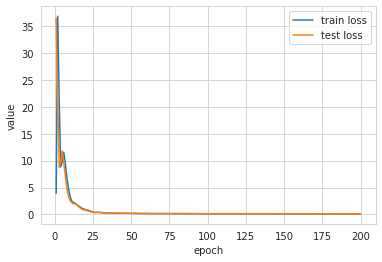

In [75]:
plt.figure()
dloss = pd.DataFrame({'epoch': np.arange(1, len(train_losses)+1, 1), 'train_loss': train_losses, 'test_loss': test_losses})
sns.lineplot(x='epoch', y='train_loss', data=dloss, label='train loss')
sns.lineplot(x='epoch', y='test_loss', data=dloss, label='test loss')
plt.ylabel('value')
plt.legend()
plt.show()

0


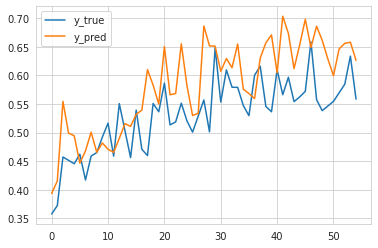

In [79]:
sid = np.random.randint(0, x_test.shape[0])
sid=0
print(sid)
sx = x_test[sid: sid+1, :, :]
sy = tensor2numpy(y_test[sid])
sy_hat = tensor2numpy(net(sx.to(device)))[0]
plt.figure()
plt.plot(sy, label='y_true')
plt.plot(sy_hat, label='y_pred')
plt.legend()
plt.show()

In [289]:
# np.save('./%s_y.npy' % (dataset), sy)

In [80]:
# np.save('./%s_%s_%d_1.npy' % (dataset, str(net.attrs), sid), sy_hat)

In [81]:
# y_true = np.load('./%s_y.npy' % dataset, allow_pickle=True)
# y_VSD = np.load("./%s_['VSD']_0.npy" % dataset, allow_pickle=True)
# y_SBD = np.load("./%s_['SBD']_0_1.npy" % dataset, allow_pickle=True)
# y_full = np.load("./%s_['VSD', 'SBD']_0.npy" % dataset, allow_pickle=True)

In [82]:
x = list(np.arange(1, len(y_true) + 1, 1)) * 3#4
value = list(y_true) + list(y_VSD) + list(y_SBD) #+ list(y_full)
fusion = ['Ground Truth'] * len(y_true) + ['PARTS-VSD'] * len(y_true) + ['PARTS-SBD'] * len(y_true)# + ['PARTS-Full'] * len(y_true)

In [83]:
df = pd.DataFrame({'x': x,
                   'y': value,
                   'Alignment Case': fusion})

In [84]:
df

,x,y,Alignment Case
0,1,0.357702,Ground Truth
1,2,0.372191,Ground Truth
2,3,0.457335,Ground Truth
3,4,0.451434,Ground Truth
4,5,0.445532,Ground Truth
...,...,...,...
160,51,0.599502,PARTS-SBD
161,52,0.646502,PARTS-SBD
162,53,0.656163,PARTS-SBD
163,54,0.658184,PARTS-SBD


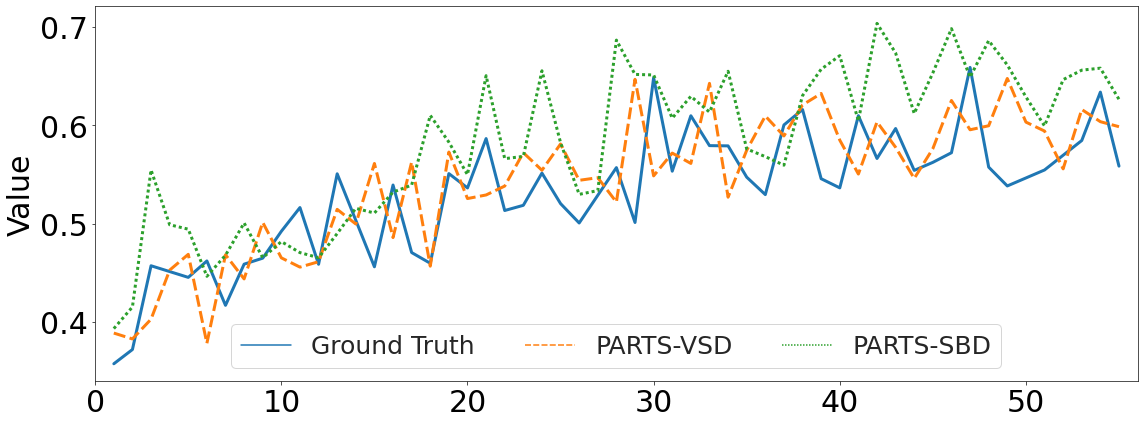

In [85]:
fig=plt.figure(figsize=(16,6))
sns.set_style('ticks')
sns.lineplot(x='x', y='y', hue='Alignment Case', data=df, style='Alignment Case', palette="tab10", linewidth=3)

plt.tick_params(labelsize=fontsize, labelcolor=labelcolor)
plt.xlabel('')
# plt.xlabel('Time Step', fontsize=fontsize, color=labelcolor)
plt.ylabel('Value', fontsize=fontsize, color=labelcolor)

# plt.ylim(0, 1)
plt.xlim(0, len(y_true) + 1)
plt.legend(fontsize=25, ncol=4, loc='lower center')
    
plt.tight_layout()
plt.savefig('%s_case.pdf' % (dataset), dpi=1200, format='pdf')
plt.show()

In [ ]:
# def evaluate(x, y, net, clips=12, suppress_output=False):
#     y_hat = net(x.to(device))
#     y_hat = y_hat[:, :clips]
#     y = y[:, :clips].to(device)
#     loss = criterion(y_hat, y)
#     RMSE = loss.item()# ** 0.5
#     MAPE = compute_MAPE(y, y_hat)
#     MAE = compute_MAE(y, y_hat)
#     if suppress_output == False:
#         print('samples: %d - %d\ntime clips: %d\nQL: %.2f\nMAPE: %.2f%%\nMAE: %.2f' % (y_hat.shape[0], y.shape[0], clips, RMSE, MAPE, MAE))
#     return RMSE, MAPE, MAE

In [51]:
def normalized_quantile_loss(x, y, net, q=0.5):
    ## From: https://medium.com/the-artificial-impostor/quantile-regression-part-2-6fdbc26b2629
    y_hat = net(x.to(device))
    y = y.to(device)
    
    QL = 2.0 * torch.sum(
                torch.abs(
                    (y_hat - y)
                    * ((y_hat >= y).float() - q)
                )
         )
    norm = torch.sum(torch.abs(y))
    return QL / norm
    if norm > 0:
        return QL / norm
    else:
        return QL / torch.sum(torch.abs(y_hat))

In [52]:
p50 = normalized_quantile_loss(x_test, y_test, net, q=0.5).item()
p90 = normalized_quantile_loss(x_test, y_test, net, q=0.9).item()
print('p50:%.6f, p90:%.6f' % (p50, p90))

p50:0.059945, p90:0.065512


In [ ]:
def multiple_runs(net, loader, device, x_test, y_test,
                  run_times=10, epochs=200, learning_rate=1e-3, weight_decay=1e-6):
    list_p50, list_p90 = [], []
    for time in range(run_times):
        print('#----------%d----------#' % (time + 1))
        train_losses, test_losses = net.fit(loader=loader, device=device, 
                                            epochs=epochs, learning_rate=learning_rate, weight_decay=weight_decay)
        p50 = normalized_quantile_loss(x_test, y_test, net, q=0.5).item()
        p90 = normalized_quantile_loss(x_test, y_test, net, q=0.9).item()
        print('p50:%.6f, p90:%.6f' % (p50, p90))
        list_p50.append(p50)
        list_p90.append(p90)
        torch.cuda.empty_cache()
    df = pd.DataFrame({'p50': list_p50, 'p90': list_p90})
    return df

In [ ]:
num_inputs=1
num_channels=[4, 8, 16]
backcast_horizon=x.shape[-1]
forecast_horizon=y.shape[-1]
kernel_size=2
dropout=0.2

In [ ]:
run_times=10
epochs=100
learning_rate=1e-2
weight_decay=1e-6

In [ ]:
# full fusion
print('******************** full ********************')
net = ReCNet(shapelets=load_shp, num_inputs=num_inputs, num_channels=num_channels, 
             backcast_horizon=backcast_horizon, forecast_horizon=forecast_horizon, 
             kernel_size=kernel_size, dropout=dropout, attrs=['VSD', 'SBD']).to(device)
loader, x_train, y_train, x_test, y_test = net.preprocess(x, y, test_size=0.2, batch_size=256)
df_full = multiple_runs(net, loader, device, x_test, y_test,
                        run_times=run_times, epochs=epochs, learning_rate=learning_rate, weight_decay=weight_decay)
df_full.to_csv('%s%druns_full.csv' % (path, run_times), index=None)

# VSD fusion
print('******************** VSD ********************')
net = ReCNet(shapelets=load_shp, num_inputs=num_inputs, num_channels=num_channels, 
             backcast_horizon=backcast_horizon, forecast_horizon=forecast_horizon, 
             kernel_size=kernel_size, dropout=dropout, attrs=['VSD']).to(device)
loader, x_train, y_train, x_test, y_test = net.preprocess(x, y, test_size=0.2, batch_size=256)
df_vsd = multiple_runs(net, loader, device, x_test, y_test,
                        run_times=run_times, epochs=epochs, learning_rate=learning_rate, weight_decay=weight_decay)
df_vsd.to_csv('%s%druns_VSD.csv' % (path, run_times), index=None)

# SBD fusion
print('******************** SBD ********************')
net = ReCNet(shapelets=load_shp, num_inputs=num_inputs, num_channels=num_channels, 
             backcast_horizon=backcast_horizon, forecast_horizon=forecast_horizon, 
             kernel_size=kernel_size, dropout=dropout, attrs=['SBD']).to(device)
loader, x_train, y_train, x_test, y_test = net.preprocess(x, y, test_size=0.2, batch_size=256)
df_sbd = multiple_runs(net, loader, device, x_test, y_test,
                        run_times=run_times, epochs=epochs, learning_rate=learning_rate, weight_decay=weight_decay)
df_sbd.to_csv('%s%druns_SBD.csv' % (path, run_times), index=None)

# none fusion
print('******************** none ********************')
net = ReCNet(shapelets=load_shp, num_inputs=num_inputs, num_channels=num_channels, 
             backcast_horizon=backcast_horizon, forecast_horizon=forecast_horizon, 
             kernel_size=kernel_size, dropout=dropout, attrs=None).to(device)
loader, x_train, y_train, x_test, y_test = net.preprocess(x, y, test_size=0.2, batch_size=256)
df_none = multiple_runs(net, loader, device, x_test, y_test,
                        run_times=run_times, epochs=epochs, learning_rate=learning_rate, weight_decay=weight_decay)
df_none.to_csv('%s%druns_none.csv' % (path, run_times), index=None)

In [ ]:
# p50 = normalized_quantile_loss(x_test, y_test, net, q=0.5).item()
# p90 = normalized_quantile_loss(x_test, y_test, net, q=0.9).item()
# print('p50:%.3f, p90:%.3f' % (p50, p90))

In [ ]:
# # best_net = torch.load('best_model.pkl')
# path = './best_model.pkl'
# best_net = ReCNet(shapelets=load_shp, num_inputs=1, num_channels=[4, 8, 16], 
#                   backcast_horizon=x.shape[-1], forecast_horizon=y.shape[-1], 
#                   kernel_size=2, dropout=0.2).to(device)
# checkpoint = torch.load(path)
# best_net.load_state_dict(checkpoint['state_dict'])

In [ ]:
dataset = 'Phoneme'
path = './%s/' % dataset

In [ ]:
df_full = pd.read_csv('%s%druns_full.csv' % (path, run_times))
df_vsd = pd.read_csv('%s%druns_VSD.csv' % (path, run_times))
df_sbd = pd.read_csv('%s%druns_SBD.csv' % (path, run_times))
df_none = pd.read_csv('%s%druns_none.csv' % (path, run_times))

In [ ]:
print(np.mean(df_full['p50']), np.mean(df_full['p90']))
print(np.mean(df_vsd['p50']), np.mean(df_vsd['p90']))
print(np.mean(df_sbd['p50']), np.mean(df_sbd['p90']))
print(np.mean(df_none['p50']), np.mean(df_none['p90']))

In [ ]:
print(np.std(df_full['p50']), np.std(df_full['p90']))
print(np.std(df_vsd['p50']), np.std(df_vsd['p90']))
print(np.std(df_sbd['p50']), np.std(df_sbd['p90']))
print(np.std(df_none['p50']), np.std(df_none['p90']))

In [ ]:
metric = (['p50'] * run_times + ['p90'] * run_times) * 4
fusion = ['Full'] * 2 * run_times + ['VSD'] * 2 * run_times + ['SBD'] * 2 * run_times + ['None'] * 2 * run_times
error = list(df_full['p50']) + list(df_full['p90']) + list(df_vsd['p50']) + list(df_vsd['p90']) \
      + list(df_sbd['p50']) + list(df_sbd['p90']) + list(df_none['p50']) + list(df_none['p90'])

In [ ]:
df_box = pd.DataFrame({'metric': metric, 'fusion': fusion, 'error': error})

In [ ]:
df_box

In [ ]:
fig=plt.figure(figsize=(8,6))

ax1 = sns.barplot(x="fusion", y="error", hue='metric', data=df_box,
            palette="tab10", capsize=.2, ci=95)
ax2 = sns.stripplot(x="fusion", y="error", hue='metric', data=df_box,
              palette="rainbow", size=10, dodge=True,
              edgecolor="gray", alpha=.5)

# plt.title('%s' % dataset, fontsize=fontsize, color=labelcolor)
plt.tick_params(labelsize=fontsize, labelcolor=labelcolor)
plt.xlabel('Alignment Cases', fontsize=fontsize, color=labelcolor)
plt.ylabel('Error', fontsize=fontsize, color=labelcolor)

# plt.ylim(0, 1)
plt.legend(fontsize=fontsize // 2, ncol=4, loc='lower center')
    
plt.tight_layout()
plt.savefig('%s%s_ablation_%d.pdf' % (path, dataset, run_times), dpi=1200, format='pdf')
plt.show()

In [ ]:
# fig=plt.figure(figsize=(8,6))
    
# sns.boxplot(x="fusion", y="error", hue="metric", data=df_box)

# plt.title('Ablation Evaluation', fontsize=fontsize, color=labelcolor)
# plt.tick_params(labelsize=fontsize, labelcolor=labelcolor)
# plt.xlabel('fusion modules', fontsize=fontsize, color=labelcolor)
# plt.ylabel('error', fontsize=fontsize, color=labelcolor)
    
# plt.tight_layout()
# plt.savefig('%sablation_%d.pdf' % (path, run_times), dpi=1200, format='pdf')
# plt.show()